In [194]:
import matplotlib.pyplot as plt
import numpy
import pandas

# Death vs Confirmed COVID-19 cases
## China, Italy and Spain

### Data from https://github.com/CSSEGISandData/COVID-19

2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

https://www.sciencedirect.com/science/article/pii/S0140673620306279?dgcid=api_sd_search-api-endpoint



In [195]:
deaths    = pandas.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed = pandas.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')



In [196]:
country_deaths    = deaths.groupby('Country/Region', as_index=False).sum()
country_confirmed = confirmed.groupby('Country/Region', as_index=False).sum()

country_deaths.drop('Lat',  axis=1, inplace=True)
country_deaths.drop('Long',  axis=1, inplace=True)


country_confirmed.drop('Lat',  axis=1, inplace=True)
country_confirmed.drop('Long', axis=1, inplace=True)

In [197]:
compare_deaths    = country_deaths.loc   [country_deaths   ['Country/Region'].isin(['Spain','Italy','China'])]
compare_confirmed = country_confirmed.loc[country_confirmed['Country/Region'].isin(['Spain','Italy','China'])]


compare_deaths    = compare_deaths   .set_index('Country/Region')
compare_confirmed = compare_confirmed.set_index('Country/Region')

compare = compare_deaths / compare_confirmed * 100

compare



,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,3.10219,2.799378,2.826087,2.987198,2.698795,2.850191,2.377927,2.184984,2.100479,2.173026,...,3.943095,3.954175,3.969988,3.984801,3.996202,4.003401,4.003692,4.008364,4.022261,4.020187
Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,6.810985,7.309977,7.712652,7.944519,8.338700,8.297795,8.574892,9.005562,9.259698,10.275965
Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.051166,3.706078,3.439952,4.536942,4.478792,4.620609,5.110240,5.418933,6.159622,8.033231


# 2020-03-23 Report

## covid-19 mortality rate is about 4.91% of confirmed cases 

## The effects of delaying social isolation in Spain and Italy

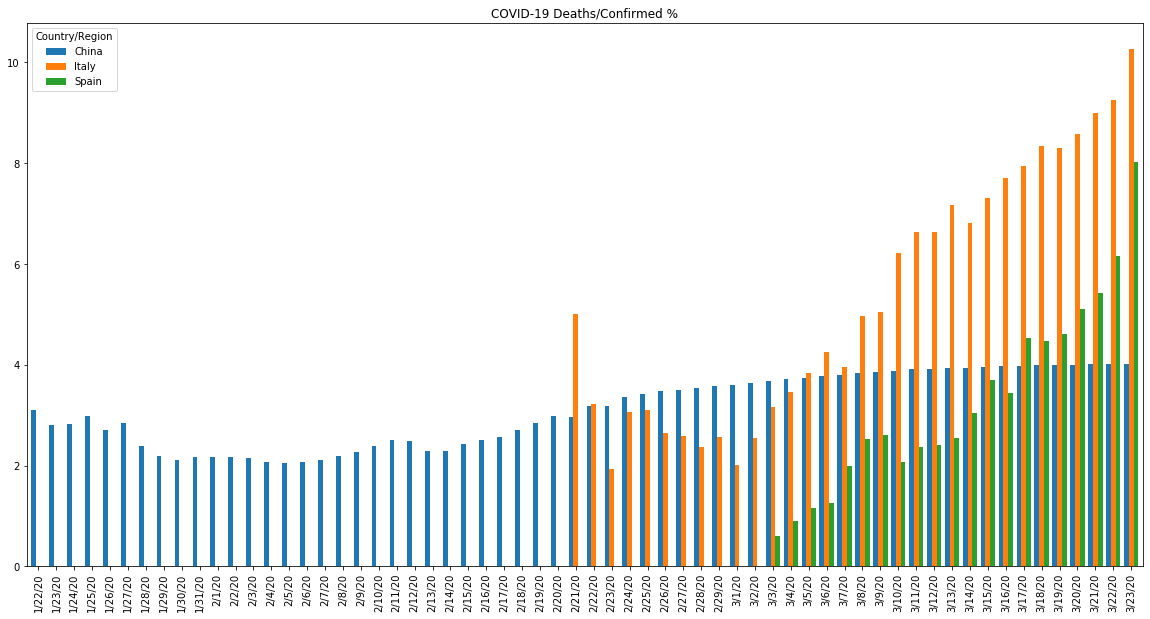

In [198]:
compare.T.plot.bar(figsize=(20,10),width=0.8)
plt.title('COVID-19 Deaths/Confirmed %')
plt.show()

In [199]:
tasa_mortalidad=deaths['3/23/20'].sum()/confirmed['3/23/20'].sum()*100

muertes_italia  =compare_deaths   [compare_deaths   .index.isin(['Italy'])]['3/23/20'].sum()
confirmed_italia=compare_confirmed[compare_confirmed.index.isin(['Italy'])]['3/23/20'].sum()
esperado_italia =confirmed_italia*tasa_mortalidad/100
evitable_italia =muertes_italia-esperado_italia


muertes_spain   =compare_deaths   [compare_deaths   .index.isin(['Spain'])]['3/23/20'].sum()
confirmed_spain =compare_confirmed[compare_confirmed.index.isin(['Spain'])]['3/23/20'].sum()
esperado_spain  =confirmed_spain*tasa_mortalidad/100
evitable_spain  =muertes_spain-esperado_spain

print('Casos COVID-19 Totales     : ',confirmed['3/23/20'].sum())
print('Muertes Totales            : ',deaths['3/23/20'].sum())
print('Tasa de Mortalidad         : ',tasa_mortalidad)
print('______________________________________________________')
print('Confirmados en Italia      : ',confirmed_italia)
print('Muertes en Italia:         : ',muertes_italia)
print('Tasa Mortalidad en Italia  : ',muertes_italia/confirmed_italia*100)
print('Muertes evitables en Italia: ',evitable_italia)
print('______________________________________________________')
print('Confirmados en España      : ',confirmed_spain)
print('Muertes en España          : ',muertes_spain)
print('Tasa Mortalidad en España  : ',muertes_spain/confirmed_spain*100)
print('Muertes evitables en España: ',evitable_spain)
print('______________________________________________________')
print('Muertes evitables          : ',evitable_italia+evitable_spain)

Casos COVID-19 Totales     :  336004.0
Muertes Totales            :  16505
Tasa de Mortalidad         :  4.912143903048773
______________________________________________________
Confirmados en Italia      :  59138.0
Muertes en Italia:         :  6077
Tasa Mortalidad en Italia  :  10.275964692752545
Muertes evitables en Italia:  3172.0563386150166
______________________________________________________
Confirmados en España      :  28768.0
Muertes en España          :  2311
Tasa Mortalidad en España  :  8.033231368186874
Muertes evitables en España:  897.874441970929
______________________________________________________
Muertes evitables          :  4069.9307805859453
